# Final Project - Parallel Merge Sort
 CS3851 - 021

 Ryley Powell

## Introduction
### Computation Problem
The problem solved by the Parallel Merge Sort is the same as the original Merge Sort algorithm (further referred to as parallel and original respectively), in that the goal is to arrange the elements of a given dataset in a particular order. The difference between the parallel and original version is how each division, or sub-problem, is handled. The original is executed on a single process/thread, while the parallel version spawns’ additional processes/threads to be passed to other computational bodies to be executed.

### Two Applications of the Algorithm
The applications of original version and parallel version of the algorithm are much of the same with one caveat. Depending on how the parallel version is implemented, it will lose the stable property of the original. Therefore, as long as stability is not important, the applications are much the same.
	
1. Sorting Large Datasets

    Suppose Google and it’s 900,000 servers needed to sort a significantly large dataset on the magnitude of billions of elements. By passing (approximately) equal-length partitions to x number of servers, the running-time to complete the sort drops by a factor of x, where x is the number of computational bodies available, in this case being the number of servers Google has available for the task.

2. Real-Time Systems

    In a real-time system, missing execution deadlines can range between multiple levels of severity, where a soft deadline indicates that the system is able to recover and that the consequences are minimal (i.e. a small delay in response), and a hard deadline indicates a catastrophic failure in which the consequences are severe (i.e. loss of life). While the original algorithm is fairly fast, in relative terms to an algorithm such as insertion sort; by using the parallel version of merge sort, the time required to sort data drop by a factor of x number of computational bodies. While the benefits of this may be small on the scale of only thousands of elements, it can very well make the difference in responding to a hard deadline where every moment of time is critical.

### Asymptotic Time Complexities
The worst-case time complexity of Parallel Merge Sort is `O(n log(n))`, where `n > n0 > 0`, and `x`, the number of computational bodies, is 1. The worst-case of the Parallel Merge Sort is effectively the Original Merge Sort as the benefits of the parallel version decay when only one computational body is available, decomposing into a sequential (Original) Merge Sort.

The average-case time complexity of Parallel Merge Sort is `O((n log(n)/x)`, where `n > n0 > 0`, and `x`, the number of computational bodies, is `1 < x < n`.

The best-case time complexity of Parallel Merge Sort is `O(log(n)`, where `n > n0 > 0`, and `x`, the number of computational bodies, is `x = n`.

### Comparison to Other Algorithms Solving the Same Problem
Another common sorting algorithm can be parallelized is Quick Sort. Both base algorithms have an average-case time complexity of `O(n log(n))`, and both base algorithms have a `O(n)` space complexity. The difference between base cases is how each algorithm is implemented and thus affecting the auxiliary space required to complete the sort on a given data set.
When comparing the time complexities of the parallelized versions of each algorithm, I’ll ignore the best-case as it is naïve to consider the best-case for Parallel Merge Sort as it is impractical to consider having `x = n` computational bodies for large datasets. While Parallel Quick Sort performs better with `O((log(n)^2)` time, this relies on an ideal set of pivots being selected for the sort. For the purposes of the final project, the implementation for Parallel Quick Sort is not ideal has it requires significantly more overhead in the form of thread/process communication compared to Parallel Merge Sort.


## Hardware
The benchmarks performed in this lab were executed on following system:

| Item | Value |
| :--: | :---: |
| OS Name | Microsoft Windows 10 Education |
| Processor | Intel(R) Core(TM) i7-7500 CPU @ 2.70Ghz, 2 Core(s), 4 Logical Processor(s)
| Installed Physical Memory (RAM) | 16.0 GB |
| Total Virtual Memory | 62.8 GB |

### Version 1 - First Attempt
In this implementation, the algorithm spawns a new thread for every left-partition, if and only if the active number of threads is less than the given *max_threads* argument.

A visual of the idea:

![Version 1](version1.png "Version 1")

The following will persist through all versions unless stated otherwise: 

Parallel merge sort is benchmarked for ten trials and averaged against the base version on lists of randomly generated integer elements containing 1,000, 10,000, and 100,000 elements.

Parallel merge sort is given `max_threads` values of 2, 4, 8, 16, and No Limit (i.e. `sys.maxsize`).

#### Benchmarks (v1)

In [4]:
import sys
from sorting import merge_sort, ParallelMergeSortV1
from benchmark import *

numbers1 = [1000, 10000, 100000]

merge_avg_times = []
parallel_merge_v1_avg_times_2 = []
parallel_merge_v1_avg_times_4 = []
parallel_merge_v1_avg_times_8 = []
parallel_merge_v1_avg_times_16 = []
parallel_merge_v1_avg_times_no_limit = []

print("Starting Benchmarking of Version 1...")
for i in numbers1:
    print("Trail: ", i, " elements.")
    merge_avg_times.append(benchmark(function=merge_sort, num_elements=i))
    parallel_merge_v1_avg_times_2.append(benchmark(function=ParallelMergeSortV1.parallel_merge_sort, num_elements=i, max_threads=2))
    parallel_merge_v1_avg_times_4.append(benchmark(function=ParallelMergeSortV1.parallel_merge_sort, num_elements=i, max_threads=4))
    parallel_merge_v1_avg_times_8.append(benchmark(function=ParallelMergeSortV1.parallel_merge_sort, num_elements=i, max_threads=8))
    parallel_merge_v1_avg_times_16.append(benchmark(function=ParallelMergeSortV1.parallel_merge_sort, num_elements=i, max_threads=16))
    parallel_merge_v1_avg_times_no_limit.append(benchmark(function=ParallelMergeSortV1.parallel_merge_sort, num_elements=i, max_threads=sys.maxsize))
    
print("Merge Sort: ", merge_avg_times)
print("Parallel Merge Sort v1 - 2 Threads: ", parallel_merge_v1_avg_times_2)
print("Parallel Merge Sort v1 - 4 Threads: ", parallel_merge_v1_avg_times_4)
print("Parallel Merge Sort v1 - 8 Threads: ", parallel_merge_v1_avg_times_8)
print("Parallel Merge Sort v1 - 16 Threads: ", parallel_merge_v1_avg_times_16)
print("Parallel Merge Sort v1 - No Limit: ", parallel_merge_v1_avg_times_no_limit)

Starting Benchmarking of Version 1...
Trail:  1000  elements.
Trail:  10000  elements.
Trail:  100000  elements.
Merge Sort:  [0.006228180000016436, 0.0623170900000332, 3.502972710000017]
Parallel Merge Sort v1 - 2 Threads:  [0.18814281999998456, 4.1393985699999805, 46.35210349000001]
Parallel Merge Sort v1 - 4 Threads:  [0.1701843700000154, 2.396522229999937, 31.72249658999999]
Parallel Merge Sort v1 - 8 Threads:  [0.17534924000003685, 4.8022415900000395, 32.37137033000003]
Parallel Merge Sort v1 - 16 Threads:  [0.17221653999997671, 2.8297182299999806, 33.60917537999999]
Parallel Merge Sort v1 - No Limit:  [0.17942567999998574, 2.236651539999957, 32.28477181999997]


#### Plot (v1)

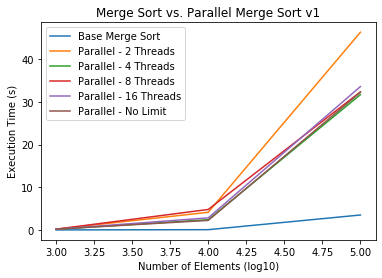

In [6]:
import matplotlib.pyplot as mat

mat.figure(0)
mat.plot(num.log10(numbers1), merge_avg_times, label='Base Merge Sort')
mat.plot(num.log10(numbers1), parallel_merge_v1_avg_times_2, label='Parallel - 2 Threads')
mat.plot(num.log10(numbers1), parallel_merge_v1_avg_times_4, label='Parallel - 4 Threads')
mat.plot(num.log10(numbers1), parallel_merge_v1_avg_times_8, label='Parallel - 8 Threads')
mat.plot(num.log10(numbers1), parallel_merge_v1_avg_times_16, label='Parallel - 16 Threads')
mat.plot(num.log10(numbers1), parallel_merge_v1_avg_times_no_limit, label='Parallel - No Limit')
mat.xlabel('Number of Elements (log10)')
mat.ylabel('Execution Time (s)')
mat.title('Merge Sort vs. Parallel Merge Sort v1')
mat.legend()
mat.show()

#### Analysis (v1)
There are a couple of things I noticed in benchmarking version 1:

1. All of the times performed poorly compared to the Base Merge Sort.
2. Limiting the number of threads to 2 performed worse than all other cases.

The problem stems from how threads are created and are joined.
```
        if p < r:
            q = int((p + r) / 2)
            th = None
            
            # The next line here only ensures there are no more than t
            # threads running at any given time
            if threading.active_count() < t:
                th = threading.Thread(target=ParallelMergeSortV1.parallel_merge_sort, args=(lst, p, q, t))
                th.start()
            else:
                ParallelMergeSortV1.parallel_merge_sort(lst, p, q) # Mistake of not passing t, therefore call defaults to t=sys.maxsize

            ParallelMergeSortV1.parallel_merge_sort(lst, q + 1, r) # Mistake of not passing t, therefore call defaults to t=sys.maxsize

            # As soon as thread joins, a new one can be created on the above check.
            if th is not None:
                th.join()

            ParallelMergeSortV1.parallel_merge(lst, p, q, r)
```

### Version 2 - Divide, Divide, Conquer, and Conquer
In this implementation, I followed GeeksForGeeks where there are effectively two divide and two conquer steps.

The two divide steps is that each thread is assigned a range of elements on the array to work on, and uses the base version of merge sort to sort the given partition.

The two conquer steps is when each thread performs the base version of merge, and then after joining with the primary thread a final merge is performed over each thread partition.

**NOTE:** This version is explicitly limited to exactly 4 threads, and has only been tested to work on input sizes evenly divisible by 4.

**NOTE:** This version is supplied with input sizes of 1,000, 10,000, 100,000, 1,000,000

#### Benchmarks (v2)

In [1]:
from benchmark import *
from sorting import merge_sort, ParallelMergeSortV2
numbers2 = [1000, 10000, 100000, 1000000]
merge_avg_times_2 = []
parallel_merge_v2_avg_times_4 = []

print("Starting Benchmarking of Version 2...")
for j in numbers2:
    print("Trail: ", j, " elements.")
    merge_avg_times_2.append(benchmark(function=merge_sort, num_elements=j))
    parallel_merge_v2_avg_times_4.append(benchmark(function=ParallelMergeSortV2.parallel_merge_sort2, num_elements=j, max_threads=4))
    
print("Merge Sort: ", merge_avg_times_2)
print("Parallel Merge Sort v2 - 4 Threads: ", parallel_merge_v2_avg_times_4)

Starting Benchmarking of Version 2...
Trail:  1000  elements.
Trail:  10000  elements.
Trail:  100000  elements.
Trail:  1000000  elements.
Merge Sort:  [0.007107479999999966, 0.11744262999999992, 1.05535204, 12.623203539999995]
Parallel Merge Sort v2 - 4 Threads:  [0.008444969999999974, 0.09775372000000004, 0.9700693100000002, 11.904868170000004]


#### Plot (v2)

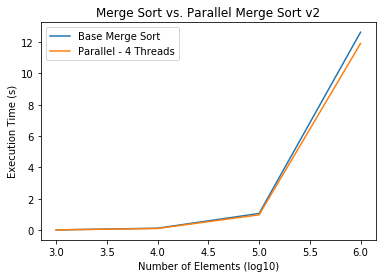

In [2]:
import matplotlib.pyplot as mat
import numpy as num
mat.figure(1)
mat.plot(num.log10(numbers2), merge_avg_times_2, label='Base Merge Sort')
mat.plot(num.log10(numbers2), parallel_merge_v2_avg_times_4, label='Parallel - 4 Threads')
mat.xlabel('Number of Elements (log10)')
mat.ylabel('Execution Time (s)')
mat.title('Merge Sort vs. Parallel Merge Sort v2')
mat.legend()
mat.show()

#### Analysis (v2)
This version of the parallel merge sort performs, on average, slightly better than that of the sequential merge sort.

The limitation of this version is that it only works with 4 threads, and requires two divide and two conquer steps.

My next thought was to go back to version 1 and correct issues in the design.

```
        size = len(lst)    # this line was used just to make the boundaries easier to read
        if t == 0:
            ...
        else:
            threads = []
            for i in range(t):
                p = int(i * (size / t))
                r = int((i + 1) * (size / t) - 1)
                ...
                threads.append(threading.Thread(target=merge_sort, args=(lst, p, r)))

            for j in threads:
                j.start()

            for k in threads:
                k.join()

        # This is not generalized, as is handled by the primary thread only.
        merge(lst, 0, int((size / 2 - 1) / 2), int(size / 2 - 1))
        merge(lst, int(size / 2), int(size / 2 + (size - 1 - size / 2) / 2), int(size - 1))
        merge(lst, 0, int((size - 1) / 2), int(size - 1))
```

### Version 3 - Correcting Version 1
Noticing the proof of concept in Version 2, and noticing the marginal gains in time, I went back to revamp version 1.

More Specifically, I corrected the mistakes identified in the analysis from version 1.

Also, this version of the algorithm only modifies the `merge_sort(...)` function. The `merge(...)` is completely untouched as I noticed post-version 1 there was no need to modify `merge(...)`.

**NOTE:** This version uses the `max_thread` values of 2, 4, 8, and 16.

**NOTE:** This version uses the same input sizes as version 2.

#### Benchmarking (v3)

In [3]:
from sorting import merge_sort, ParallelMergeSortV3
from benchmark import *

numbers3 = [1000, 10000, 100000, 1000000]

merge_avg_times_3 = []
parallel_merge_v3_avg_times_2 = []
parallel_merge_v3_avg_times_4 = []
parallel_merge_v3_avg_times_8 = []
parallel_merge_v3_avg_times_16 = []

print("Starting Benchmarking of Version 3...")
for k in numbers3:
    print("Trail: ", k, " elements.")
    merge_avg_times_3.append(benchmark(function=merge_sort, num_elements=k))
    parallel_merge_v3_avg_times_2.append(benchmark(function=ParallelMergeSortV3.parallel_merge_sort3, num_elements=k, max_threads=2))
    parallel_merge_v3_avg_times_4.append(benchmark(function=ParallelMergeSortV3.parallel_merge_sort3, num_elements=k, max_threads=4))
    parallel_merge_v3_avg_times_8.append(benchmark(function=ParallelMergeSortV3.parallel_merge_sort3, num_elements=k, max_threads=8))
    parallel_merge_v3_avg_times_16.append(benchmark(function=ParallelMergeSortV3.parallel_merge_sort3, num_elements=k, max_threads=16))
    
print("Merge Sort: ", merge_avg_times_3)
print("Parallel Merge Sort v3 - 2 Threads: ", parallel_merge_v3_avg_times_2)
print("Parallel Merge Sort v3 - 4 Threads: ", parallel_merge_v3_avg_times_4)
print("Parallel Merge Sort v3 - 8 Threads: ", parallel_merge_v3_avg_times_8)
print("Parallel Merge Sort v3 - 16 Threads: ", parallel_merge_v3_avg_times_16)

Starting Benchmarking of Version 3...
Trail:  1000  elements.
Trail:  10000  elements.
Trail:  100000  elements.
Trail:  1000000  elements.
Merge Sort:  [0.008702719999928377, 0.10228088999997453, 1.1687825899999098, 15.05115082999987]
Parallel Merge Sort v3 - 2 Threads:  [0.00646563000000242, 0.08436159999996562, 1.263198179999972, 15.414510279999922]
Parallel Merge Sort v3 - 4 Threads:  [0.006307040000001507, 0.08799865000000864, 1.3859992399999554, 15.568379060000007]
Parallel Merge Sort v3 - 8 Threads:  [0.012617130000080579, 0.07885866999995414, 1.3474338100000296, 16.451682969999958]
Parallel Merge Sort v3 - 16 Threads:  [0.02458716000005552, 0.08081994000012856, 1.215056830000003, 17.09861662999997]


#### Plot (v3)

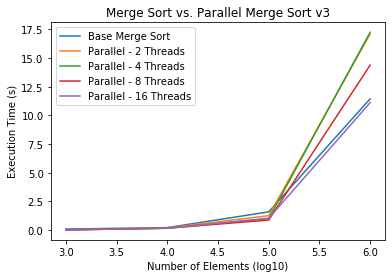

In [9]:
import matplotlib.pyplot as mat
import numpy as num

mat.figure(2)
mat.plot(num.log10(numbers3), merge_avg_times_3, label='Base Merge Sort')
mat.plot(num.log10(numbers3), parallel_merge_v3_avg_times_2, label='Parallel - 2 Threads')
mat.plot(num.log10(numbers3), parallel_merge_v3_avg_times_4, label='Parallel - 4 Threads')
mat.plot(num.log10(numbers3), parallel_merge_v3_avg_times_8, label='Parallel - 8 Threads')
mat.plot(num.log10(numbers3), parallel_merge_v3_avg_times_16, label='Parallel - 16 Threads')
mat.xlabel('Number of Elements (log10)')
mat.ylabel('Execution Time (s)')
mat.title('Merge Sort vs. Parallel Merge Sort v3')
mat.legend()
mat.show()

#### Analysis (v3)
The algorithm is starting to approach a final version, as we can see the times are performing at or below the base merge sort for specific cases.
However the time is no consistent whatsoever.

What threw me off in this implementation is that even though I corrected the flaws in version 1, I may have created a new flaw in the implementation.

The introduction of a locking mechanism allowed me to accurately control the number of threads created, but I suspect slowed the total potential of algorithm
as each thread blocked until it was able to receive the shared resource lock.
```
    # class variables
    num_threads = 0
    lock = threading.Lock()
        
        def ... # function declaration
        ...
        if p < r:
            q = int((p + r) / 2)
            th = None

            ParallelMergeSortV3.lock.acquire(True) # This is causing a lot of slowdown as the threads need to try 
                                                   # and acquire the lock everytime before the recursive call can be made
            ...
            if ParallelMergeSortV3.num_threads < t:
                ParallelMergeSortV3.num_threads += 1
                ...
                ParallelMergeSortV3.lock.release()
                ...
                th = threading.Thread(target=ParallelMergeSortV3.parallel_merge_sort, args=(lst, p, q, t))
                th.start()
            else:
                ParallelMergeSortV3.lock.release()
                ParallelMergeSortV3.parallel_merge_sort(lst, p, q, t)

            ParallelMergeSortV3.parallel_merge_sort(lst, q + 1, r, t)

            if th is not None:
                th.join()

            merge(lst, p, q, r)
```
### Version 4 - Generalizing Version 2
Although version 3 performed well, I decided to scrap the idea of trying to directly control the number of threads created through a shared resource that counts the number of threads made.

Instead, I decided to generalize version 2, by re-purposing the `t` parameter of the parallel merge sort function. Instead of passing using the idea of `max_threads`,
I tried limiting the number of elements a thread is in charge of sorting. I did this by taking the input size and dividing it by the number of threads I wanted.

**NOTE:** The input sizes used to benchmark this version will be 1,000, 10,000, 100,000, and 1,000,000.

**NOTE:** The number of threads used will be 2, 4, 8, and 16. This is accomplished by passing the `t` parameter a value of  `n / x` where `n` is the input size and `x` in the number of threads desired.
#### Benchmarks (v4) - Part 1

In [1]:
from sorting import merge_sort, ParallelMergeSortV4
from benchmark import *

numbers4 = [1000, 10000, 100000, 1000000]

merge_avg_times_4 = []
parallel_merge_v4_avg_times_2 = []
parallel_merge_v4_avg_times_4 = []
parallel_merge_v4_avg_times_8 = []
parallel_merge_v4_avg_times_16 = []

print("Starting Benchmarking of Version 4...")
for l in numbers4:
    print("Trail: ", l, " elements.")
    merge_avg_times_4.append(benchmark(function=merge_sort, num_elements=l))
    parallel_merge_v4_avg_times_2.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=l, max_threads=(l / 2)))
    parallel_merge_v4_avg_times_4.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=l, max_threads=(l /4)))
    parallel_merge_v4_avg_times_8.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=l, max_threads=(l / 8)))
    parallel_merge_v4_avg_times_16.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=l, max_threads=(l / 16)))
    
print("Merge Sort: ", merge_avg_times_4)
print("Parallel Merge Sort v4 - 2 Threads: ", parallel_merge_v4_avg_times_2)
print("Parallel Merge Sort v4 - 4 Threads: ", parallel_merge_v4_avg_times_4)
print("Parallel Merge Sort v4 - 8 Threads: ", parallel_merge_v4_avg_times_8)
print("Parallel Merge Sort v4 - 16 Threads: ", parallel_merge_v4_avg_times_16)

Starting Benchmarking of Version 4...
Trail:  1000  elements.
Trail:  10000  elements.
Trail:  100000  elements.
Trail:  1000000  elements.
Merge Sort:  [0.004902970000000018, 0.09744888999999998, 3.0677797, 9.972529669999997]
Parallel Merge Sort v4 - 2 Threads:  [0.005859049999999977, 0.07142283999999996, 1.1265575300000001, 10.699893880000005]
Parallel Merge Sort v4 - 4 Threads:  [0.006495999999999969, 0.06994197999999993, 0.9672813499999997, 10.753636499999981]
Parallel Merge Sort v4 - 8 Threads:  [0.009948050000000031, 0.07125708000000017, 0.9316499999999991, 11.242179899999991]
Parallel Merge Sort v4 - 16 Threads:  [0.009681300000000004, 0.07115112999999998, 0.8697858700000012, 11.092192949999992]


#### Plot (v4) - Part 1

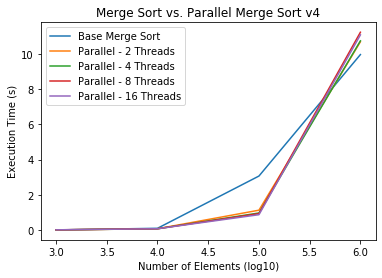

In [2]:
import matplotlib.pyplot as mat
import numpy as num

mat.figure(3)
mat.plot(num.log10(numbers4), merge_avg_times_4, label='Base Merge Sort')
mat.plot(num.log10(numbers4), parallel_merge_v4_avg_times_2, label='Parallel - 2 Threads')
mat.plot(num.log10(numbers4), parallel_merge_v4_avg_times_4, label='Parallel - 4 Threads')
mat.plot(num.log10(numbers4), parallel_merge_v4_avg_times_8, label='Parallel - 8 Threads')
mat.plot(num.log10(numbers4), parallel_merge_v4_avg_times_16, label='Parallel - 16 Threads')
mat.xlabel('Number of Elements (log10)')
mat.ylabel('Execution Time (s)')
mat.title('Merge Sort vs. Parallel Merge Sort v4')
mat.legend()
mat.show()


#### Analysis (v4) - Part 1
Something to notice from the data, is that between `(10000 / x) < t < (100000 / x)`, the parallel version **always** performs better
than the base version of Merge Sort. Which indicates there is some optimal value for `t`, that if the size of the partition is less than `t`,
the algorithm should default to the base Merge Sort.

The goal of the next benchmark will be to find this optimal value for `t`. I will be using a value of `x = 4`, therefore the interval with be `2500 < t < 25000`

```
            if p < r:
            q = int((p + r) / 2)
            tl, tr = None, None
            ...
            ...
            ...
            if (len(lst[p:q])) >= t: # check if the size of the left partition is greater than t
                ...
                ...
                tl = threading.Thread(target=ParallelMergeSortV4.parallel_merge_sort4, args=(lst, p, q, t))
                tl.start()
            else:
                ParallelMergeSortV4.parallel_merge_sort4(lst, p, q, t)

            if (len(lst[q + 1:r])) >= t: # check if the size of the right partition is greater than t
                ...
                tr = threading.Thread(target=ParallelMergeSortV4.parallel_merge_sort4, args=(lst, q + 1, r, t))
                tr.start()
            else:
                ParallelMergeSortV4.parallel_merge_sort4(lst, q + 1, r, t)
            ...

            if tl is not None:
                tl.join()

            if tr is not None:
                tr.join()

            merge(lst, p, q, r)
```

#### Benchmarks and Plots (v4) - Part 2

In [1]:
from sorting import ParallelMergeSortV4
from benchmark import *

parallel_merge = []

t_values = [2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000]
for n in range(10):
    print('T Value: ', t_values[n])
    parallel_merge.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=100000, max_threads=t_values[n]))
    
print("Parallel Merge Sort: ", parallel_merge)

T Value:  2500
T Value:  5000
T Value:  7500
T Value:  10000
T Value:  12500
T Value:  15000
T Value:  17500
T Value:  20000
T Value:  22500
T Value:  25000
Parallel Merge Sort:  [1.3193090599999997, 1.40331438, 0.8467082700000006, 0.8444669499999996, 0.8520105599999994, 0.8548721399999998, 0.8307901299999984, 0.8251376799999989, 0.8389795599999985, 0.8582923799999989]


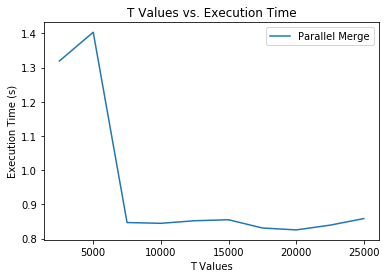

In [2]:
import matplotlib.pyplot as mat
mat.figure(4)
mat.plot(t_values, parallel_merge, label='Parallel Merge')
mat.xlabel('T Values')
mat.ylabel('Execution Time (s)')
mat.title('T Values vs. Execution Time')
mat.legend()
mat.show()

In [3]:
from sorting import ParallelMergeSortV4
from benchmark import *

parallel_merge2 = []

t_values2 = [7500, 8000, 8192, 8500, 9000, 9500, 10000, 10500, 11000]
for n in range(len(t_values2)):
    print('T Value: ', t_values2[n])
    parallel_merge2.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=100000, max_threads=t_values2[n]))
    
print("Parallel Merge Sort: ", parallel_merge2)

T Value:  7500
T Value:  8000
T Value:  8192
T Value:  8500
T Value:  9000
T Value:  9500
T Value:  10000
T Value:  10500
T Value:  11000
Parallel Merge Sort:  [0.8663835199999994, 0.7964353499999988, 0.8454346100000066, 0.8548292799999956, 0.8363444200000117, 0.8442192599999941, 0.8643295300000148, 1.0126092799999924, 0.8409549300000094]


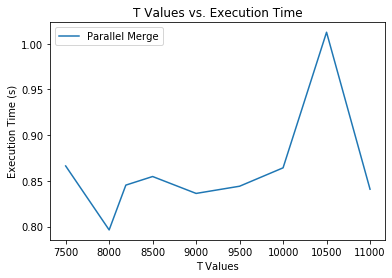

In [4]:
import matplotlib.pyplot as mat
mat.figure(5)
mat.plot(t_values2, parallel_merge2, label='Parallel Merge')
mat.xlabel('T Values')
mat.ylabel('Execution Time (s)')
mat.title('T Values vs. Execution Time')
mat.legend()
mat.show()

In [5]:
from sorting import ParallelMergeSortV4
from benchmark import *

parallel_merge3 = []

t_values3 = [7900, 8000, 8100, 8192, 8200, 8300, 8400, 8500]
for n in range(len(t_values3)):
    print('T Value: ', t_values3[n])
    parallel_merge3.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=100000, max_threads=t_values3[n]))
    
print("Parallel Merge Sort: ", parallel_merge3)

T Value:  7900
T Value:  8000
T Value:  8100
T Value:  8192
T Value:  8200
T Value:  8300
T Value:  8400
T Value:  8500
Parallel Merge Sort:  [1.039846940000001, 1.0686583800000051, 1.1254945800000087, 0.8142656799999941, 0.9734690900000146, 0.8528241499999695, 0.881085070000006, 0.8460430000000315]


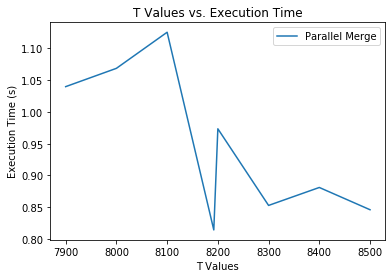

In [6]:
import matplotlib.pyplot as mat
mat.figure(5)
mat.plot(t_values3, parallel_merge3, label='Parallel Merge')
mat.xlabel('T Values')
mat.ylabel('Execution Time (s)')
mat.title('T Values vs. Execution Time')
mat.legend()
mat.show()

#### Analysis (v4) - Part 2
As seen from the above benchmarks and plots, I performed multiple rounds of benchmarks on different
sets of `t` values, and "zoomed" in on value on the interval of `8100 < t < 8200`. From a quick Google search
I found that the `Java.Collections` puts this values at `2^13`, or  `8,192`. So this will be the value
for `t` I will be selecting for the final benchmark.

#### Benchmark (v4) - Final

In [1]:
from sorting import merge_sort, ParallelMergeSortV4
from benchmark import *

merge_final = []
parallel_final = []

input_size = [1000, 10000, 100000, 1000000]
print("Starting Final Benchmark...")
for f in input_size:
    print('Trial: ', f, ' elements.')
    merge_final.append(benchmark(function=merge_sort, num_elements=f))
    parallel_final.append(benchmark(function=ParallelMergeSortV4.parallel_merge_sort4, num_elements=f, max_threads=8192))
    
print('Base Merge Sort: ', merge_final)
print('Parallel Merge Sort - Final Version: ', parallel_final)

Starting Final Benchmark...
Trial:  1000  elements.
Trial:  10000  elements.
Trial:  100000  elements.
Trial:  1000000  elements.
Base Merge Sort:  [0.0037552399999999154, 0.11088195000000005, 0.73170686, 13.496984619999997]
Parallel Merge Sort - Final Version:  [0.0043762699999999825, 0.06177787999999999, 3.1492696300000005, 9.772962769999996]


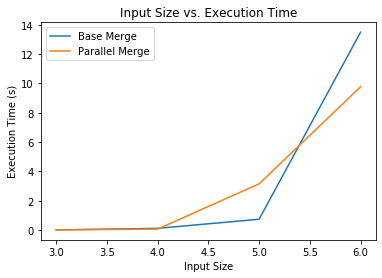

In [2]:
import matplotlib.pyplot as mat
import numpy as num
mat.figure(6)
mat.plot(num.log10(input_size), merge_final, label='Base Merge')
mat.plot(num.log10(input_size), parallel_final, label='Parallel Merge')
mat.xlabel('Input Size')
mat.ylabel('Execution Time (s)')
mat.title('Input Size vs. Execution Time')
mat.legend()
mat.show()

## Conclusions
The conclusion I've come to is Parallel Merge Sort is theoretically faster on a system that has no resource constraints. That is to say that given an ideal system
with infinitely many computational bodies (i.e. Processors) and infinite memory, Parallel Merge Sort will always perform better than the Base Merge Sort.

However, considering the resources I have available to me as outlined earlier, Parallel Merge Sort performs only marginally better than the Base Merge Sort for 
narrowly defined scopes of the overall problem. Although I did find a value for `t`, `t = 8,192`, such that if size of the partition is greater than `t`, a new
thread should be spawned. But again, this only works well on an ideal system, because as the input size grows, the number of threads created will also increase
and will end up slowing down the overall performance with context switching as seen with my system.

My final conclusion is that Parallel Merge Sort has too many variables to consider to be useful as a general purpose sorting algorithm, and instead be used
when the problem is well-defined such that the input size and the number of computational bodies is constant, and accepting the performance gained is marginal at best.
Instead, hybridizing the Merge Sort with another algorithm with a lower constant overhead (i.e. Insertion Sort), and choosing to default to this algorithm when
the partition size drops below some threshold, will likely give better results than Parallel Merge Sort.